# Assignment 8 - Support Vector Machine
### Liam Caulfield
### May 21, 2023

For this assignment we analyzed the Portuguese sea battles data, containing information about naval battle outcomes between Portuguese and Dutch/British ships between 1583 and 1663. This assignment will be completed in the following three steps:
1. Use an SVM-based model to predict the Portuguese outcome of the battle from the number of ships involved on all sides and Spanish involvement. 
2. Attempt to solve the same problem with two other classifier techniques.
3. Report and compare their results with the SVM results

In [73]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Assignment 8.csv')

In [93]:
#df.head()

In [4]:
# Split the dataset into features (X) and target variable (y)
X = df[['Portuguese Ships', 'Dutch Ships', 'English Ships', 'Ratio', 'Spanish Involvement']]
y = df['Portuguese Outcome']

In [89]:
# Create training and test datasets for independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [90]:
# establish SVM model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [91]:
y_pred = svm.predict(X_test)
y_true = df['Portuguese Outcome'].values

In [92]:
# Create classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1
           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.60      0.67      0.63         6
weighted avg       0.70      0.83      0.76         6



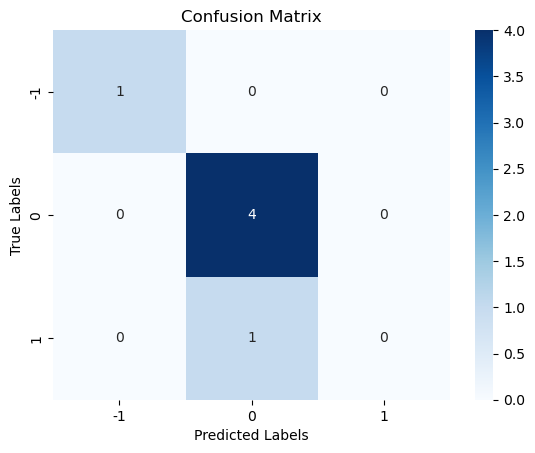

In [59]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Findings Summary for SVM modelling:**
1. The classification report shows high precision and accuracy for classes "-1" and "0", indicating a low false positive rate for these classes.
2. However, the precision for class "1" is 0.00, indicating that the model did not correctly identify any instances of class "1" among its predictions.
3. The overall accuracy is 0.83, but it is important to note that accuracy alone may not provide the complete picture, especially in the presence of class imbalance.
4. To improve precision and accuracy for class "1", consider strategies such as collecting more representative data, addressing class imbalance, or exploring different models or hyperparameters that better capture the patterns in class "1".

The classification report and performance metrics discussed are based on a small test dataset. It's important to consider that the performance of the model on this small dataset may not necessarily generalize to larger or more diverse datasets. 

In [69]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier()

In [70]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

In [71]:
# Evaluate the model
rf_classification_report = classification_report(y_test, rf_y_pred)
print("Random Forest Classification Report:")
print(rf_classification_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         1

    accuracy                           0.17         6
   macro avg       0.17      0.08      0.11         6
weighted avg       0.33      0.17      0.22         6



In [75]:
importances = rf_model.feature_importances_

In [76]:
# Get the names of the features
feature_names = df.columns[:-1]

In [77]:
# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

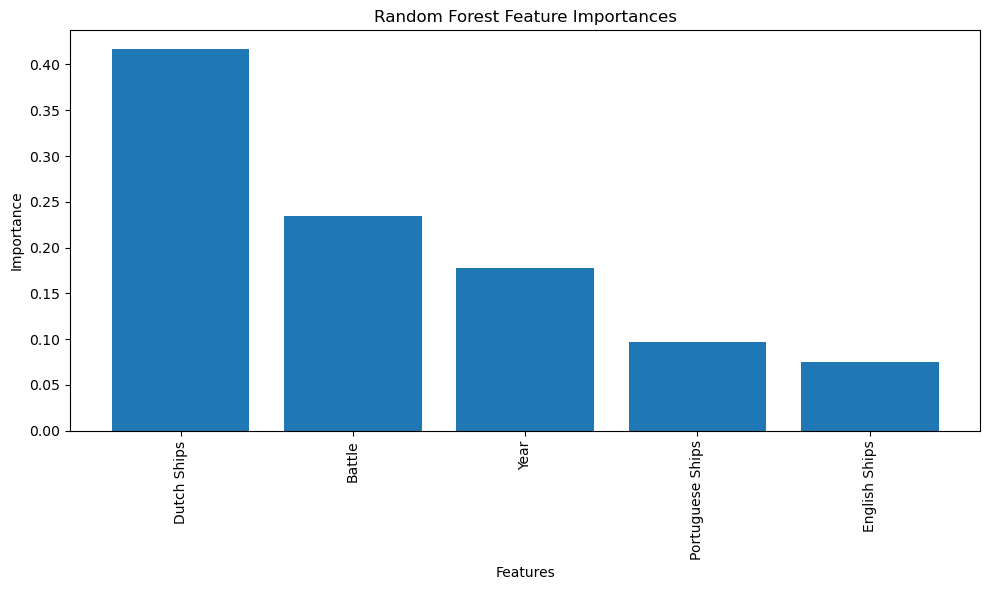

In [78]:
# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

**Findings Summary:**
The Random Forest classification report shows low precision, recall, and F1-score for all three classes (-1, 0, 1) compared to the SVM model. The accuracy is also low at 0.17, indicating poor overall performance.

1. For class "-1", the precision, recall, and F1-score are all 0.00, indicating that the model did not correctly identify any instances of this class. The support is 1, indicating that there is only one instance of this class in the test dataset.

2. For class "0", the precision is 0.50, indicating that when the model predicts an instance as class "0", it is correct half of the time. The recall is 0.25, indicating that the model only captures a quarter of the instances of class "0" correctly. The F1-score is 0.33, which is the harmonic mean of precision and recall. The support is 4, indicating that there are four instances of this class in the test dataset.

3. For class "1", the precision, recall, and F1-score are all 0.00, indicating that the model did not correctly identify any instances of this class. The support is 1, indicating that there is only one instance of this class in the test dataset.

The low performance across all classes suggests that the Random Forest model is not able to effectively capture the patterns and make accurate predictions for this classification problem. Further analysis, such as tuning the hyperparameters of the Random Forest model or exploring other classification algorithms, may be necessary to improve the performance.

In [74]:
# Create a Logistic Regression Classifier
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_classification_report = classification_report(y_test, lr_y_pred)
print("Logistic Regression Classification Report:")
print(lr_classification_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.50      0.25      0.33         4
           1       0.25      1.00      0.40         1

    accuracy                           0.33         6
   macro avg       0.25      0.42      0.24         6
weighted avg       0.38      0.33      0.29         6



**Findings Summary:**

The Logistic Regression classification report shows varying precision, recall, and F1-scores for the three classes (-1, 0, 1) compared to both the SVM and Random Forest models. The accuracy is 0.33, indicating moderate overall performance.

1. For class "-1", the precision, recall, and F1-score are all 0.00, indicating that the model did not correctly identify any instances of this class. The support is 1, indicating that there is only one instance of this class in the test dataset.

2. For class "0", the precision is 0.50, indicating that when the model predicts an instance as class "0", it is correct half of the time. The recall is 0.25, indicating that the model only captures a quarter of the instances of class "0" correctly. The F1-score is 0.33, which is the harmonic mean of precision and recall. The support is 4, indicating that there are four instances of this class in the test dataset.

3. For class "1", the precision is 0.25, indicating that when the model predicts an instance as class "1", it is correct 25% of the time. The recall is 1.00, indicating that the model captures all instances of class "1" correctly. The F1-score is 0.40, which is the harmonic mean of precision and recall. The support is 1, indicating that there is only one instance of this class in the test dataset.

The overall performance of the Logistic Regression model is modest, with limited accuracy and low precision and recall for classes "-1" and "0". However, the model shows higher recall for class "1", indicating that it is able to capture all instances of this class correctly. Further analysis and model refinement may be required to improve the performance for classes "-1" and "0" and achieve better overall accuracy.

**Model Comparison:**
In comparing the three models, SVM demonstrates the highest precision and accuracy for classes -1 and 0, while Logistic Regression shows moderate performance for class 1 with higher recall. Random Forest, however, performs poorly across all classes with low precision, recall, and F1-scores. Overall, SVM outperforms the other models in terms of precision, accuracy, and overall performance, making it the most suitable choice for this particular classification problem.